In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('csv_files/video_games_sales.csv')
sales_df = pd.read_csv('csv_files/Video_Games_Sales_as_at_22_Dec_2016')

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.shape

(16598, 11)

In [4]:
df.value_counts()

Rank   Name                                              Platform  Year    Genre         Publisher   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
1      Wii Sports                                        Wii       2006.0  Sports        Nintendo    41.49     29.02     3.77      8.46         82.74           1
2      Super Mario Bros.                                 NES       1985.0  Platform      Nintendo    29.08     3.58      6.81      0.77         40.24           1
3      Mario Kart Wii                                    Wii       2008.0  Racing        Nintendo    15.85     12.88     3.79      3.31         35.82           1
4      Wii Sports Resort                                 Wii       2009.0  Sports        Nintendo    15.75     11.01     3.28      2.96         33.00           1
5      Pokemon Red/Pokemon Blue                          GB        1996.0  Role-Playing  Nintendo    11.27     8.89      10.22     1.00         31.37           1
                                 

In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna()

df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
df.fillna(df['Year'].mean(), inplace=True)
df['Publisher'].fillna('', inplace=True)

df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
df2 = df.set_index('Publisher')

df2.loc['Nintendo'].sort_values('Year')

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,,,,
Nintendo,1863,Popeye,NES,1983.0,Platform,0.51,0.12,0.45,0.02,1.10
Nintendo,422,Baseball,NES,1983.0,Sports,0.73,0.10,2.35,0.02,3.20
Nintendo,1811,Donkey Kong,NES,1983.0,Platform,0.23,0.05,0.84,0.01,1.13
Nintendo,1841,Donkey Kong Jr.,NES,1983.0,Platform,0.33,0.07,0.70,0.01,1.11
Nintendo,765,Mahjong,NES,1983.0,Misc,0.01,0.00,2.13,0.00,2.14
...,...,...,...,...,...,...,...,...,...,...
Nintendo,14304,Metroid Prime: Federation Force,3DS,2016.0,Action,0.02,0.01,0.01,0.00,0.03
Nintendo,5290,Star Fox: Zero,WiiU,2016.0,Shooter,0.16,0.10,0.07,0.03,0.35
Nintendo,2450,Kirby: Planet Robobot,3DS,2016.0,Action,0.26,0.10,0.44,0.04,0.85


In [10]:
df['Publisher'].isna().sum()

np.int64(0)

In [11]:
df.iloc[200]

Rank                          201
Name            Super Mario Bros.
Platform                       GB
Year                       1999.0
Genre                    Platform
Publisher                Nintendo
NA_Sales                      3.4
EU_Sales                      1.3
JP_Sales                     0.15
Other_Sales                  0.22
Global_Sales                 5.07
Name: 200, dtype: object

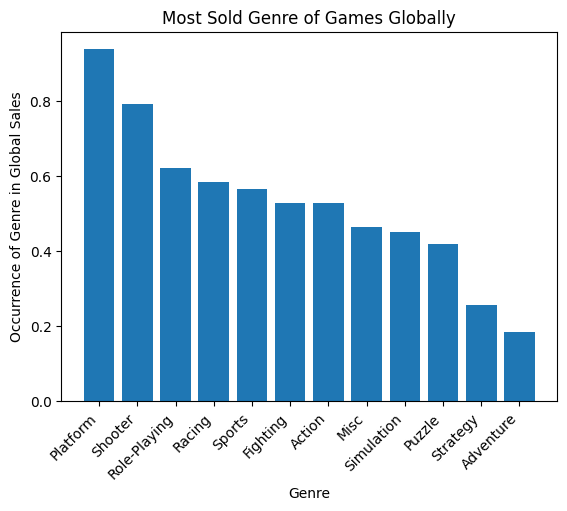

In [121]:
genre_df = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
plt.bar(genre_df.index, genre_df.values)
plt.xticks(rotation=45, ha='right')
plt.title('Most Sold Genre of Games Globally')
plt.xlabel('Genre')
plt.ylabel('Occurrence of Genre in Global Sales')
plt.show()

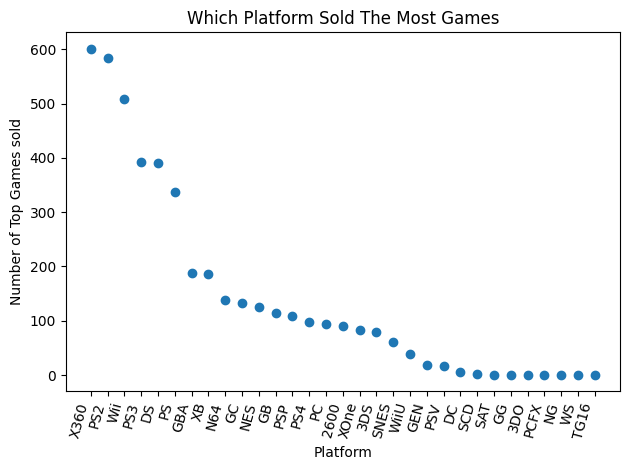

In [105]:
df.columns

df_platform = df.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False)

plt.scatter(df_platform.index, df_platform.values)
plt.xticks(rotation=75, ha='right')
plt.xlabel('Platform')
plt.ylabel('Number of Top Games sold')
plt.title('Which Platform Sold The Most Games')

plt.tight_layout()
plt.show()

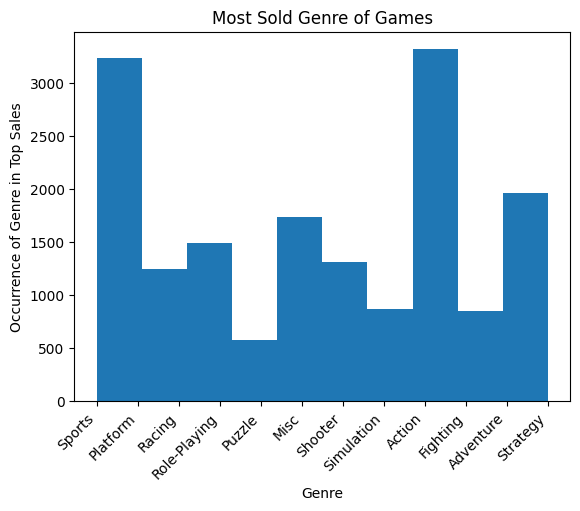

In [111]:

plt.hist(df['Genre'])
plt.xticks(rotation=45, ha='right')
plt.title('Most Sold Genre of Games')
plt.xlabel('Genre')
plt.ylabel('Occurrence of Genre in Top Sales')
plt.show()

In [4]:
sales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sales_df.rename(columns={'Year_of_Release' : 'Year'}, inplace=True)

In [9]:
combined_df = sales_df.merge(df, how='inner')

combined_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rank
0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,2
1,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,5
2,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN,6
3,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN,10
4,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN,NaN,13


In [19]:
combined_df.isna().sum()

Name               0
Platform           0
Year             198
Genre              0
Publisher         53
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    6774
Critic_Count    6774
User_Score      7406
User_Count      7406
Developer       5679
Rating          5758
Rank               0
dtype: int64

In [20]:
combined_df.duplicated().sum()

np.int64(0)

In [ ]:
combined_df['Rating'].value_counts() #make a chart with ratings, find correlations with scores. Total all the sales and make an overall chart over years. Do a multiline chart using genre, years, sales, and maybe publisher or platform
#add markdown, venv, requirements.txt, and a read.me

Rating
E       2657
T       1913
M        756
E10+     665
EC         5
K-A        3
RP         2
AO         1
Name: count, dtype: int64

In [38]:
combined_df[(combined_df['Publisher'] =='Nintendo') & (combined_df['Rating'].isna())]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rank
0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,2
1,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,5
2,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN,6
3,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN,10
4,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN,NaN,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11217,Donkey Kong Jungle Beat,Wii,2008.0,Platform,Nintendo,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,15994
11470,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,16272
11647,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,16476
11675,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,16545


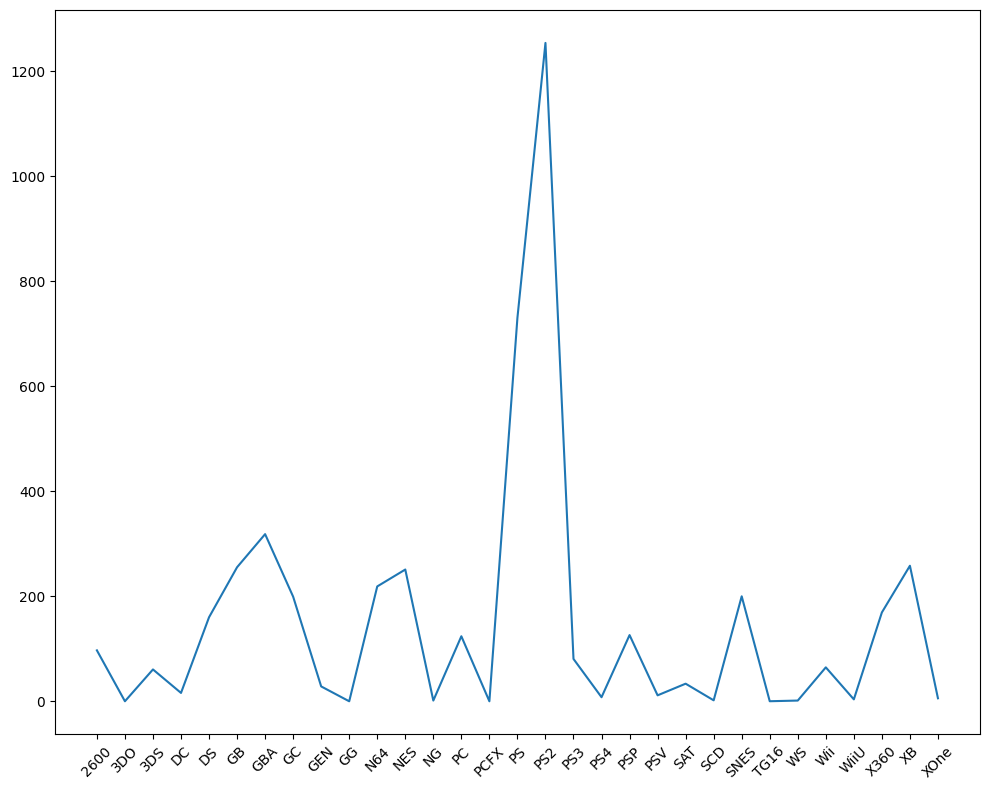

In [25]:
platform_sales = combined_df.groupby('Platform')['Global_Sales'].sum()

plt.figure(figsize=(10,8))
plt.plot(platform_sales)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

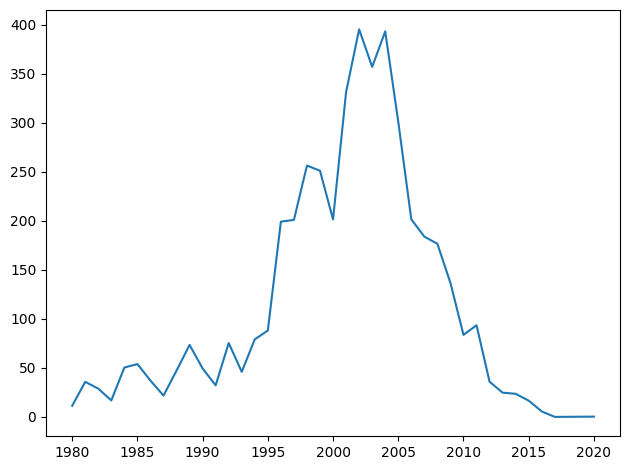

In [24]:
yearly_sales = combined_df.groupby('Year')['Global_Sales'].sum()

plt.plot(yearly_sales)

plt.tight_layout()